<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B03052019_2%5D_FHI_RT_BH_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = '/content/gdrive/My Drive/Keras/TestCircle.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/RTFILM')
zip_ref.close()

In [0]:
import numpy as np
import cv2

ok_img_list=[]
ok_label_list=[]
ng_img_list=[]
ng_label_list=[]
base_path = r'/content/RTFILM'

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            category_name = os.path.basename(root)  
            imarray = cv2.imread(filename,3)
            imarray = cv2.resize(imarray,(128,128))
            imarray = imarray.astype(np.float32)
            imarray = (imarray - np.min(imarray)) / (np.max(imarray) - np.min(imarray))
            if category_name == 'ok':
              ok_img_list.append(imarray)
              ok_label_list.append(category_name)
            elif category_name == "ng":
              ng_img_list.append(imarray)
              ng_label_list.append(category_name)

In [0]:
print(type(ok_img_list))
print(len(ok_img_list))
print(type(ng_img_list))
print(len(ng_img_list))

<class 'list'>
1773
<class 'list'>
65


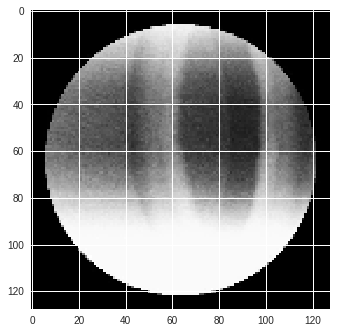

In [0]:
import matplotlib.pyplot as plt
plt.imshow(ok_img_list[0])
plt.show()

In [0]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx], cmap='binary')
    title ='label=' +str(labels[idx])
    if len(prediction)>0:
      title += 'prediction='+str(prediction[idx])
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

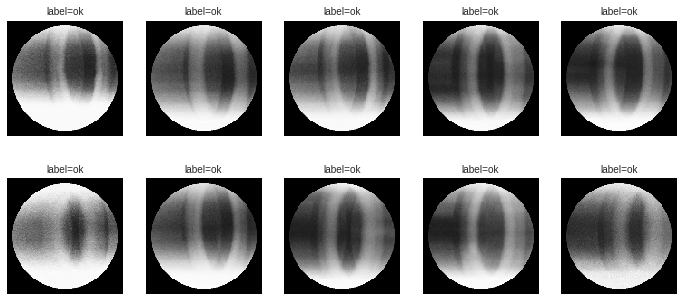

In [0]:
plot_images_labels_prediction(ok_img_list,ok_label_list,[],0,10)

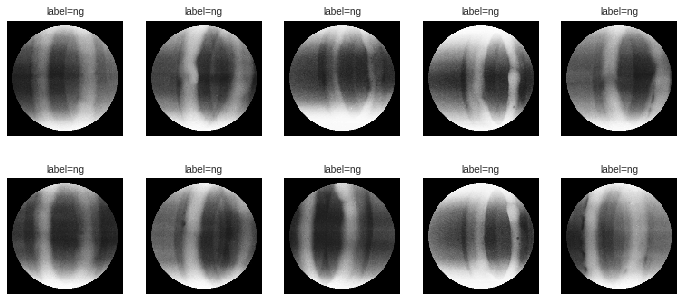

In [0]:
plot_images_labels_prediction(ng_img_list,ng_label_list,[],0,10)

In [0]:
print(np.amax(ok_img_list[0]))
print(type(ok_img_list[0]))

1.0
<class 'numpy.ndarray'>


In [0]:
img_arr   = np.concatenate((ok_img_list, ng_img_list), axis = 0)
img_label = np.concatenate((ok_label_list, ng_label_list), axis = 0)

In [0]:
print(type(img_arr))
print(len(img_arr))
print(type(img_label))
print(len(img_label))

<class 'numpy.ndarray'>
1838
<class 'numpy.ndarray'>
1838


In [0]:
import random
temp = list(zip(img_arr, img_label))
random.shuffle(temp)
img_arr, img_label = zip(*temp)
img_arr=np.asarray(img_arr)
img_label=np.asarray(img_label)

In [0]:
img_label[:50]

array(['ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ng', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ng', 'ng', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok'], dtype='<U2')

In [0]:
for i in range(len(img_label)):
  if img_label[i]=="ok":
    img_label[i]=1
  elif img_label[i]=='ng':
    img_label[i]=0

In [0]:
from keras.utils import np_utils
img_label_OneHot = np_utils.to_categorical(img_label)

Using TensorFlow backend.


In [0]:
print(img_label_OneHot[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
import pandas as pd
pd.crosstab(img_label,img_label,rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0,65,0
1,0,1773
